## Feature Selection Based on Univariate ROC_AUC for Classification and MSE for Regression 

Watch it here: https://youtu.be/JEfBvK91CXc

Watch Full Playlist: https://www.youtube.com/playlist?list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH

### What is ROC_AUC 

The Receiver Operator Characteristic (ROC) curve is well-known in evaluating classification performance. Owing to its superiority in dealing with imbalanced and cost-sensitive data, the ROC curve has been exploited as a popular metric to evaluate ML models.

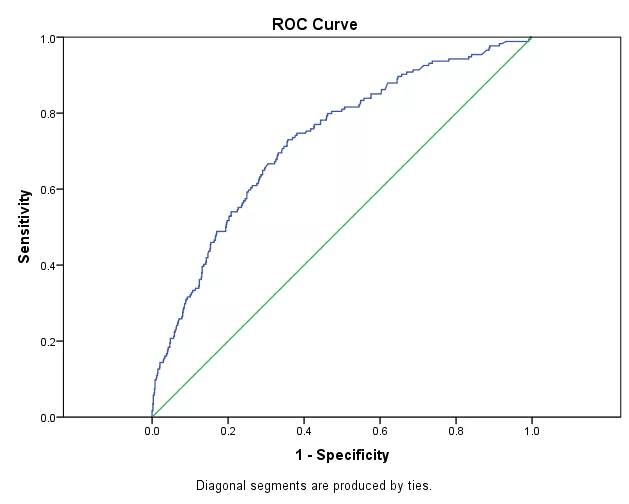

The ROC curve and AUC (area under the ROC curve) have been widely used to determine the classification accuracy in supervised learning.

It is basically used in Binary Classification

### Use of ROC_AUC in Classification Problem 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold

Download Dataset: https://github.com/laxmimerit/Data-Files-for-Feature-Selection

In [3]:
data = pd.read_csv('santander.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Remove Constant, Quasi Constant and Duplicate Features

In [6]:
#remove constant and quasi constant features
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [7]:
X_train_filter.shape, X_test_filter.shape

((16000, 245), (4000, 245))

In [8]:
370-245

125

In [9]:
#remove duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [10]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [11]:
X_train_T.duplicated().sum()

18

In [12]:
duplicated_features = X_train_T.duplicated()

In [13]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [14]:
X_train_unique.shape, X_train.shape

((16000, 227), (16000, 370))

####  Now calculate ROC_AUC Score

In [15]:
roc_auc = []
for feature in X_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train_unique[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))

In [16]:
print(roc_auc)

[0.5020561820568537, 0.5, 0.5, 0.49986968986187125, 0.501373452866903, 0.49569976544175137, 0.5028068643863192, 0.49986968986187125, 0.5, 0.5, 0.4997393797237425, 0.5017643832812891, 0.49569976544175137, 0.49960906958561374, 0.49895751889497003, 0.49700286682303885, 0.49960906958561374, 0.5021553136956755, 0.4968725566849101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.4959603857180089, 0.5, 0.5048318679438659, 0.4997393797237425, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49921813917122754, 0.49921813917122754, 0.49824600955181303, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4983763196899418, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [17]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values.sort_values(ascending =False, inplace = True)

In [18]:
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
236    0.500000
80     0.500000
89     0.500000
88     0.500000
87     0.500000
86     0.500000
85     0.500000
84     0.500000
83     0.500000
82     0.500000
81     0.500000
78     0.500000
79     0.500000
92     0.500000
77     0.500000
75     0.500000
74     0.500000
72     0.500000
70     0.500000
         ...   
160    0.500000
172    0.500000
7      0.499870
220    0.499870
175    0.499870
76     0.499870
208    0.499870
3      0.499870
10     0.499739
222    0.499739
205    0.499739
108    0.499739
13     0.499609
16     0.499609
212    0.499549
116    0.499218
117    0.499218
209    0.499158
123    0.499088
156    0.499088
14     0.498958
210    0.498827
125    0.498376
119    0.498246
15     0.497003
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: floa

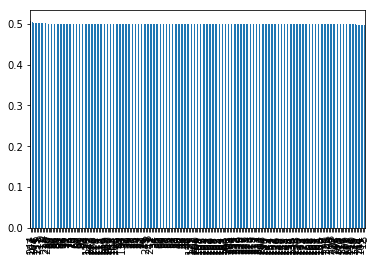

In [19]:
roc_values.plot.bar()

In [20]:
sel = roc_values[roc_values>0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [21]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

### Build the Model and compare the performance 

In [22]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ', accuracy_score(y_test, y_pred))

In [23]:
%%time
run_randomForest(X_train_roc, X_test_roc, y_train, y_test)

Accuracy on test set:  0.95275
Wall time: 891 ms


In [24]:
X_train_roc.shape

(16000, 11)

In [25]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set:  0.9585
Wall time: 1.49 s


### Feature Selection using RMSE in Regression 

In [26]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
y = boston.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
mse = []
for feature in X_train.columns:
    clf = LinearRegression()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test, y_pred))

In [35]:
mse

[76.38674157646072,
 84.66034377707906,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.90735162739531,
 80.3915476111525,
 82.61874125667717,
 82.46499985731934,
 78.30831374720842,
 81.79497121208001,
 77.75285601192718,
 46.336305360025925]

In [37]:
mse = pd.Series(mse, index = X_train.columns)
mse.sort_values(ascending=False, inplace = True)
mse

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

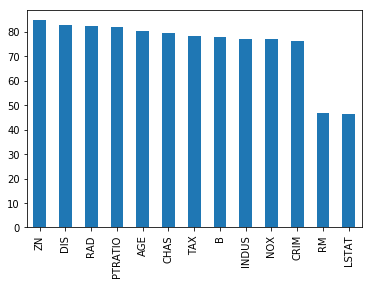

In [38]:
mse.plot.bar()

In [39]:
X_train_2 = X_train[['RM', 'LSTAT']]
X_test_2 = X_test[['RM', 'LSTAT']]

In [42]:
%%time
model = LinearRegression()
model.fit(X_train_2, y_train)
y_pred = model.predict(X_test_2)
print('r2_score: ', r2_score(y_test, y_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('sd of house price: ', np.std(y))

r2_score:  0.5409084827186417
rmse:  6.114172522817781
sd of house price:  9.188011545278203
Wall time: 3 ms


In [43]:
%%time
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('r2_score: ', r2_score(y_test, y_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('sd of house price: ', np.std(y))

r2_score:  0.5892223849182492
rmse:  5.783509315085146
sd of house price:  9.188011545278203
Wall time: 4 ms
